# VPN Usage Treemap

In this project we get usage of our users and make data tree that who is using the most.

Data is reading from vpn panel API.

In [23]:
# Data proccessing
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Make HTTP requests
import requests as req

# Color and treemap
import seaborn as sb
import squarify

# Config
from config.config import env

In [24]:
# The base URL
base_url = "http://95.216.138.218:2003"

# Add headers to authorize in API
headers = {
    "Cookie": env('COOCIE')
}

# Get list of 
list = req.post(f"{base_url}/xui/inbound/list", headers=headers, data={})

# Make json and get only `obj` item
data = list.json()["obj"]

In [25]:
# Defile our needed columns
columns_to_keep = ['up', 'down', 'remark', 'id']

# Make dataframe
df = pd.DataFrame(data)

# Just select our needed columns
df = df.loc[:, columns_to_keep]

# Show dataframe
df

,up,down,remark,id
0,7295451002,41150892978,Amirhossein Mohammadi,1
1,349618555,3897126178,Amirhossein,2
2,680456821,2218938482,Amirhissein SBBIRAN,3
3,1868039798,20970898036,RG,4
4,1799319792,46102031402,MZ,5
5,1910934921,27754453177,New RG,9
6,239521042,2804718672,SA,13
7,48866321,1513130916,Niloo,15
8,923937163,2418121350,Jalal,16
9,117526012,3064821451,Sina,17


## Treemap

Here we can only get treemap of usages.

Example: [tsetmc.com](http://main.tsetmc.com/marketmap)

[D]ownload or [U]pload?d


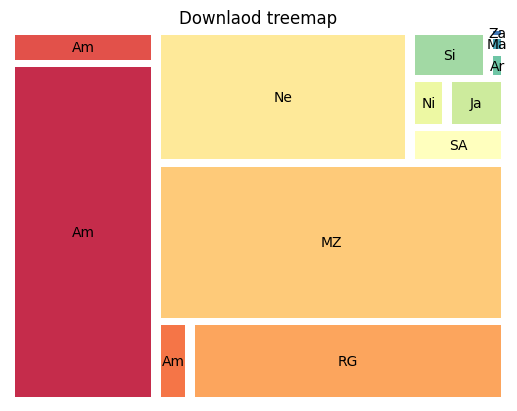

In [26]:
# Get input of what user want
select = input("[D]ownload or [U]pload?")

# Create chart dictionary
chart = {}

# Switch case
match select.lower():
    case 'd':
        chart['data'] = df.down
        chart['name'] = 'Downlaod'
    case 'u':
        chart['data'] = df.up
        chart['name'] = 'Downlaod'
    case _:
        print('Invalid selection. Select is only u or d.')
    
# Draw chart if chart is available
if chart:
    # Make treemap
    squarify.plot(
        sizes=chart['data'], # Add data
        label=[item["remark"][0:2] for item in data], # Add labels
        pad=0.1,
        color=sb.color_palette("Spectral", len(df)) # Add color
    )

    # Customize and show
    plt.title(f"{chart['name']} treemap") # Title
    plt.axis("off") # Disable border stuf
    plt.show() # Show the plot

## Bar chart

Here is the bar chart of usage.

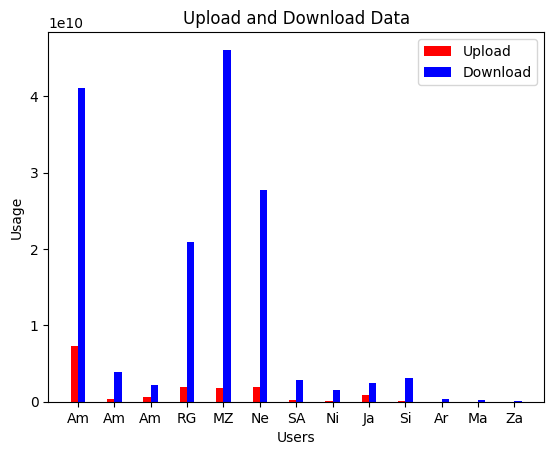

In [27]:
# Set the bar width
bar_width = 0.2

# Set the x positions of the bars
r1 = np.arange(len(df))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.bar(r1, df.up, color='red', width=bar_width, label='Upload')
plt.bar(r2, df.down, color='blue', width=bar_width, label='Download')

# Customize the chart
plt.title('Upload and Download Data') # Title
plt.xlabel('Users') # Set x label
plt.ylabel('Usage') # Set y label
plt.xticks([r + bar_width/2 for r in range(len(df))], [item[:2] for item in df['remark']]) # Set each bar label
plt.legend() # Add helper
plt.show() # Show plot

## Pie chart

Here is the pie chart of usage.

[D]ownload or [U]pload?d


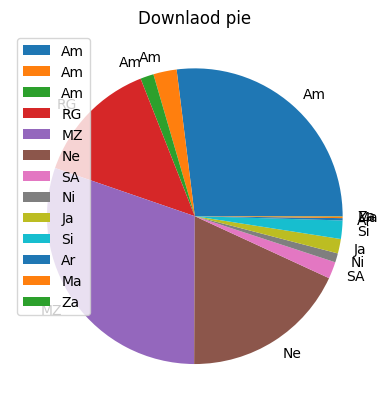

In [28]:
# Get input of what user want
select = input("[D]ownload or [U]pload?")

# Create chart dictionary
chart = {}

# Switch case
match select.lower():
    case 'd':
        chart['data'] = df.down
        chart['name'] = 'Downlaod'
    case 'u':
        chart['data'] = df.up
        chart['name'] = 'Downlaod'
    case _:
        print('Invalid selection. Select is only u or d.')
    
# Draw chart if chart is available
if chart:
    # Make pie
    plt.pie(chart['data'], labels=[item[:2] for item in df['remark']])

    # Customize and show
    plt.title(f"{chart['name']} pie") # Title
    plt.axis("off") # Disable border stuf
    plt.legend()
    plt.show() # Show the plot